<a href="https://colab.research.google.com/github/IlhomJabborov/Netflix-Movie-and-TV-Show/blob/main/netflix(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
show_id: har bir shou uchun noyob identifikator
type: Kontent turi - kino yoki teleko'rsatuv
title: Film/televidenie shousining nomi
director: film/televidenie shousi rejissyori
cast: film/televidenie shouidagi aktyorlar
country: shou mavjud mamlakat
date_added: shou Netflix-ga qo'shilgan sana
release_year: Film/televidenie shousining chiqarilgan yili
rating: ko'rsatuv uchun TV/Kino reytingi
duration: Filmning davomiyligi (daqiqalarda)/TV shousi (fasllarda)
listed_in: ko'rsatuv ro'yxatga olingan turkum
description: Syujetning qisqacha tavsifi

"""

In [ ]:
# datasetni yuklash
# zip fayldan ochdim
! unzip "/content/archive.zip"

Archive:  /content/archive.zip
replace netflix_titles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# import library(kutubxonalarni o'rnatish)

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly import graph_objects as go

In [ ]:
# df == *csv
df = pd.read_csv("/content/netflix_titles.csv")

In [ ]:
# view df
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **Basic Info dataset**

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df_null =df.isnull().sum()
df_null

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df_null.sum()

4307

In [ ]:
df.duplicated().sum()

0

***Df haqida boshlang'ish xulosalar : ***   


1.   df 8807 ta qator va 12 ta ustundan iborat
2.   release_year ustuni type float64.Qolgan barcha ustunlar object type da.
3.   6 ta ustun null qiymatiga ega :    
          1.   director - 2634
          2.   cast - 825
          3.   country - 831
          4.   date_added - 10
          5.   rating - 4
          6.   duration - 3
4.   df dagi umumiy nullar soni - 4307
5.   dublikat(takrorlangan) qatorlar yo'q





In [ ]:
#Imputation - yuqolgan qiymatlarni to'g'irlash

df.director.fillna("no director",inplace=True)
df.cast.fillna("no cast",inplace=True)
df.country.fillna("Country Unavailable",inplace=True)
df.dropna(subset=["date_added","rating","duration"],inplace=True)

In [ ]:
df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

## **Visualization**

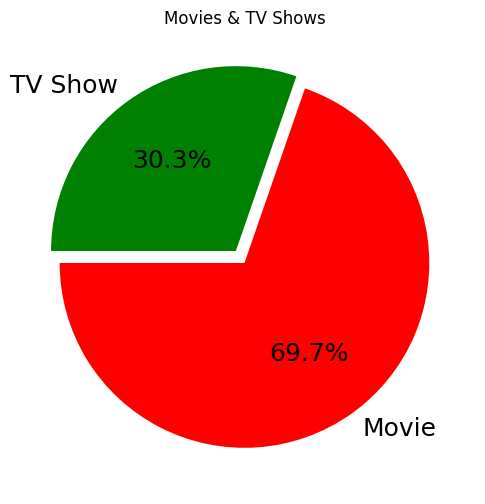

In [ ]:
# Netflix kontent turi(type)
# 1

values = df['type'].value_counts()
labels = df['type'].value_counts().index

plt.figure(figsize=(12,6))

plt.title("Movies & TV Shows")

plt.pie(values,explode=(0, 0.08),labels=labels,colors=['red','green'],autopct='%1.1f%%',startangle=180,textprops={'fontsize': 18})
plt.show()

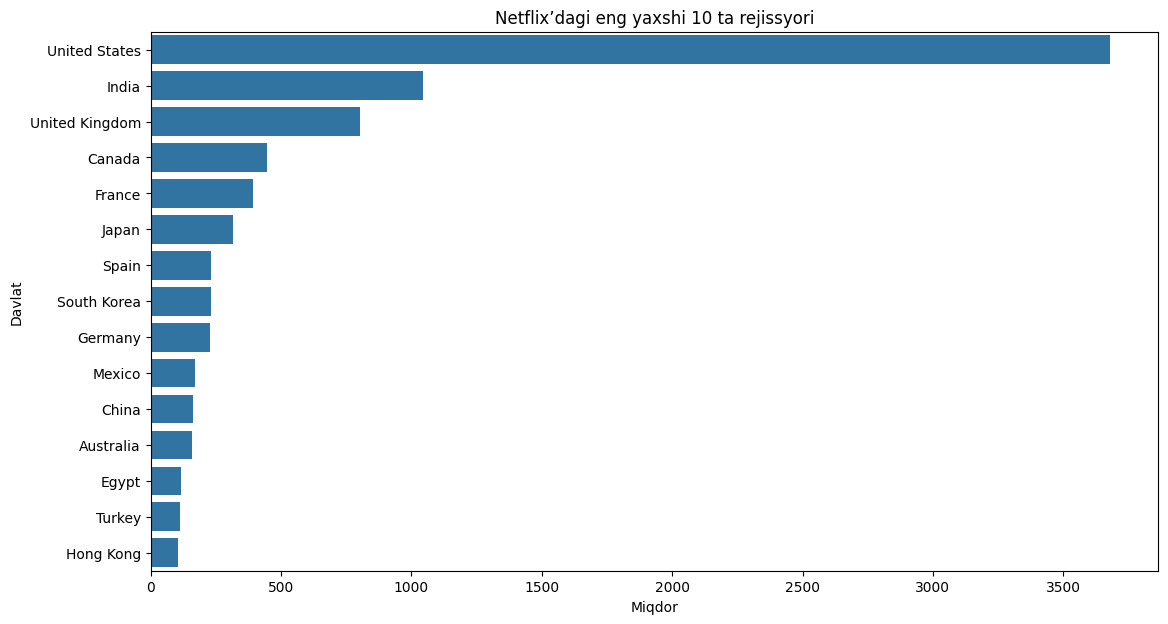

In [ ]:
# Mahsulotlar miqdori bo‘yicha mamlakatlar
#2

# Splitting countries from the 'country' column and stacking them - Mamlakatlarni "mamlakat" ustunidan ajratish va ularni yig'ish
filter_elements = df.set_index('title')['country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Resetting the index to ensure uniqueness - Yagonalikni ta'minlash uchun indeksni qayta o'rnatish
filter_elements = filter_elements.reset_index(drop=True)

# Removing 'Country Unavailable' entries - "Mamlakat mavjud emas" yozuvlarini olib tashlash
filter_elements = filter_elements[filter_elements != 'Country Unavailable']

# Plotting
plt.figure(figsize=(13, 7))
sns.countplot(y=filter_elements, order=filter_elements.value_counts().index[:15])
plt.title('Netflix’dagi eng yaxshi 10 ta rejissyori')
plt.xlabel('Miqdor')
plt.ylabel('Davlat')
plt.show()


<ipython-input-16-75ec226d93ef>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=filter_elements, order=filter_elements.value_counts().index[:10],palette="rocket")


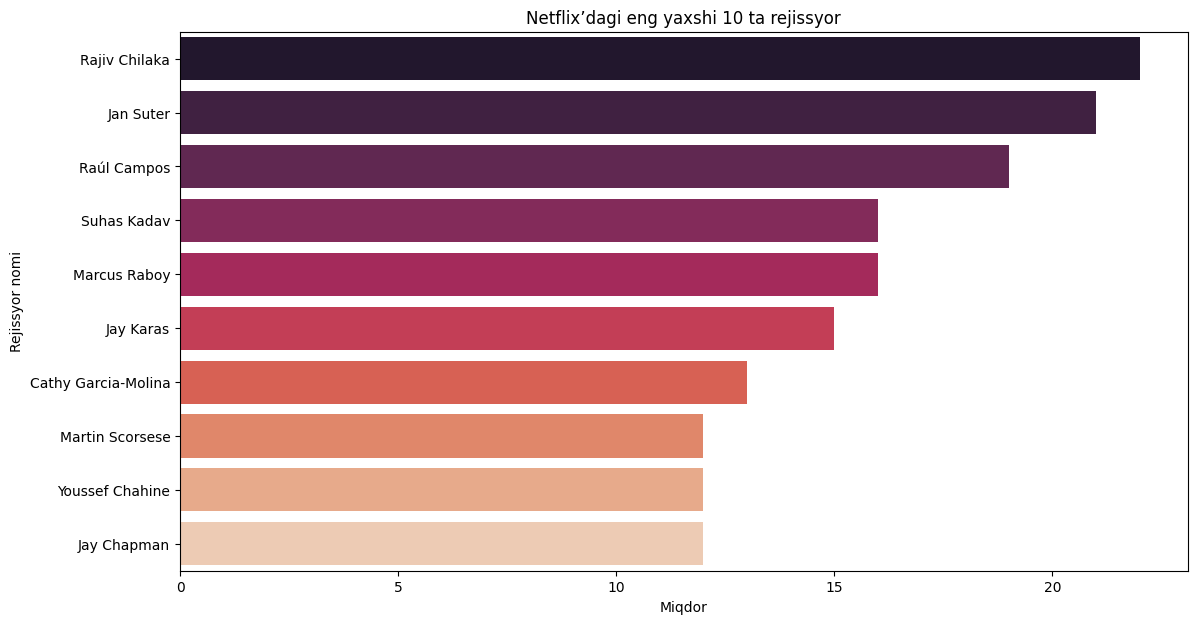

In [ ]:
# Netflixdagi eng yaxshi direktorlar
# 3

filter_elements = df.set_index('title')['director'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
filter_elements = filter_elements.reset_index(drop=True)
filter_elements = filter_elements[filter_elements != 'no director']

# Plotting
plt.figure(figsize=(13, 7))
sns.countplot(y=filter_elements, order=filter_elements.value_counts().index[:10],palette="rocket")
plt.title('Netflix’dagi eng yaxshi 10 ta rejissyor')
plt.xlabel('Miqdor')
plt.ylabel('Rejissyor nomi')
plt.show()


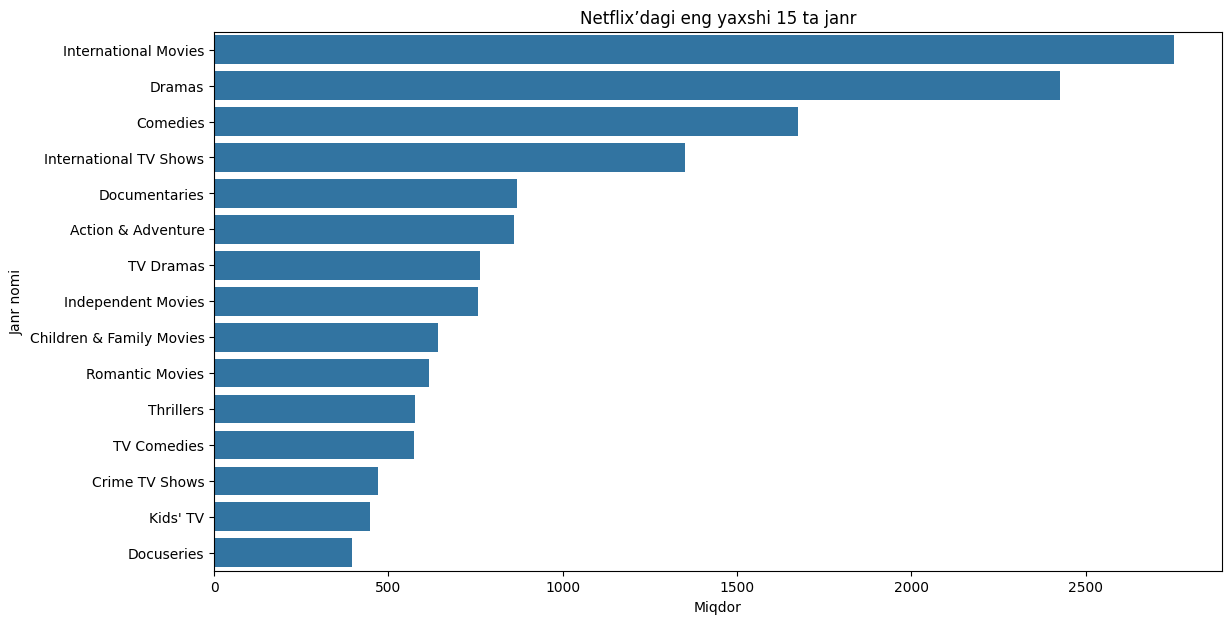

In [ ]:
# Netflixdagi eng yaxshi janrlar
# 4

filter_elements = df.set_index('title')['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
filter_elements = filter_elements.reset_index(drop=True)


# Plotting
plt.figure(figsize=(13, 7))
sns.countplot(y=filter_elements, order=filter_elements.value_counts().index[:15])
plt.title('Netflix’dagi eng yaxshi 15 ta janr')
plt.xlabel('Miqdor')
plt.ylabel('Janr nomi')
plt.show()

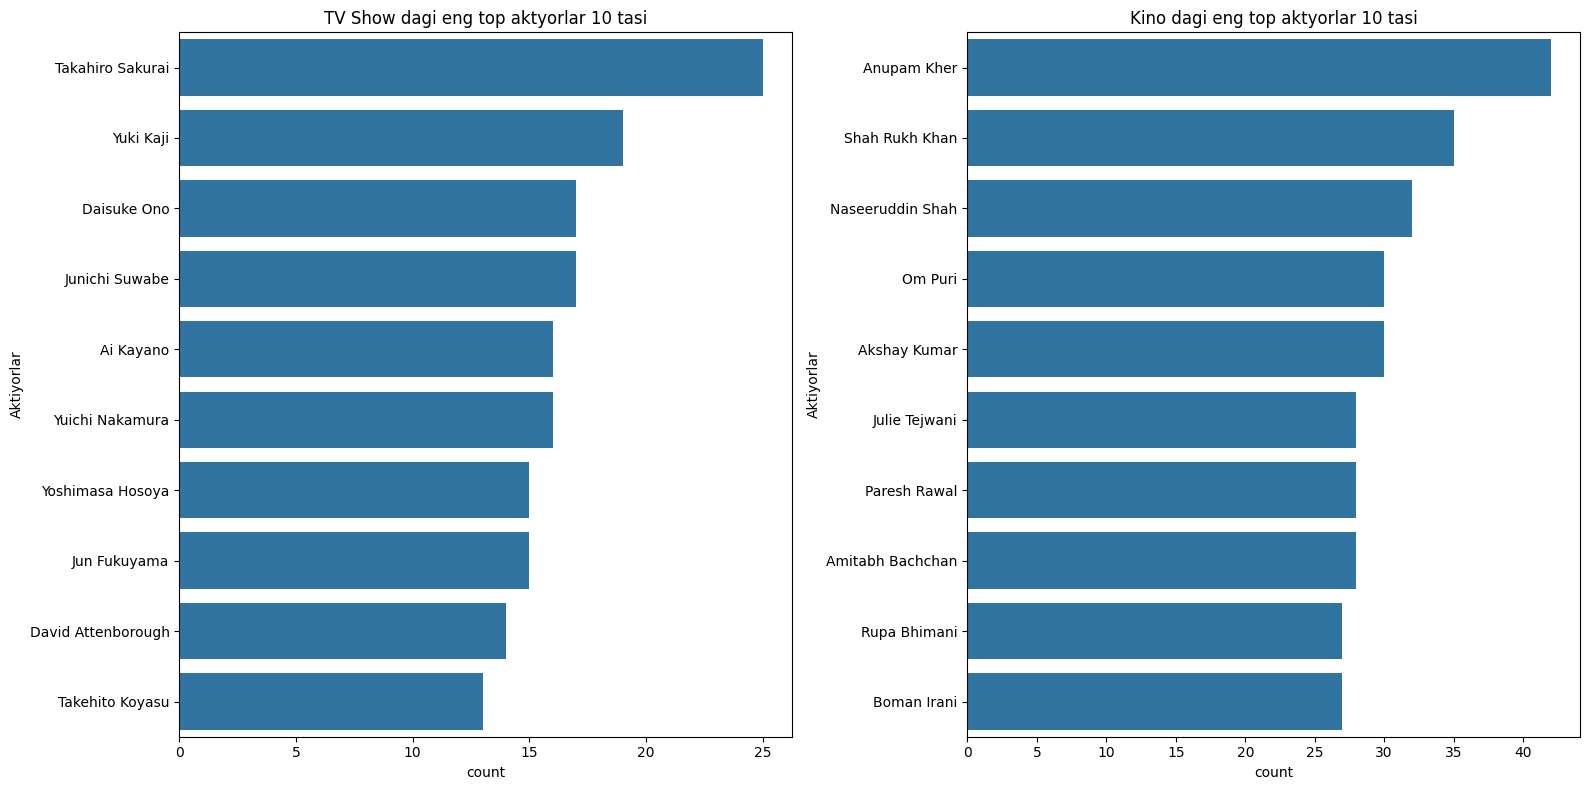

In [ ]:
# kino va tv dagi top aktyorlar
# 5

df2 = df[df['type'] == "TV Show"]
df3 = df[df['type'] == "Movie"]


plt.figure(figsize=(16, 8))


plt.subplot(1, 2, 1)
plt.title('TV Show dagi eng top aktyorlar 10 tasi')
filter_elements_tv = df2.set_index('title')['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
filter_elements_tv = filter_elements_tv.reset_index(drop=True)
filter_elements_tv = filter_elements_tv[filter_elements_tv != 'no cast']
sns.countplot(y=filter_elements_tv, order=filter_elements_tv.value_counts().index[:10])
plt.ylabel('Aktiyorlar')


plt.subplot(1, 2, 2)
plt.title('Kino dagi eng top aktyorlar 10 tasi')
filter_elements_movie = df3.set_index('title')['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
filter_elements_movie = filter_elements_movie.reset_index(drop=True)
filter_elements_movie = filter_elements_movie[filter_elements_movie != 'no cast']
sns.countplot(y=filter_elements_movie, order=filter_elements_movie.value_counts().index[:10])
plt.ylabel('Aktiyorlar')


plt.tight_layout()
plt.show()


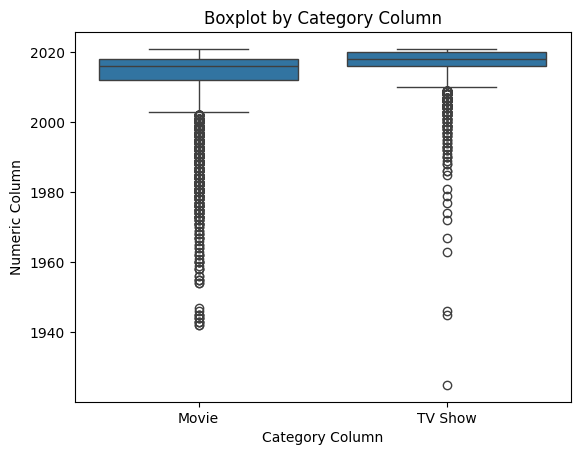

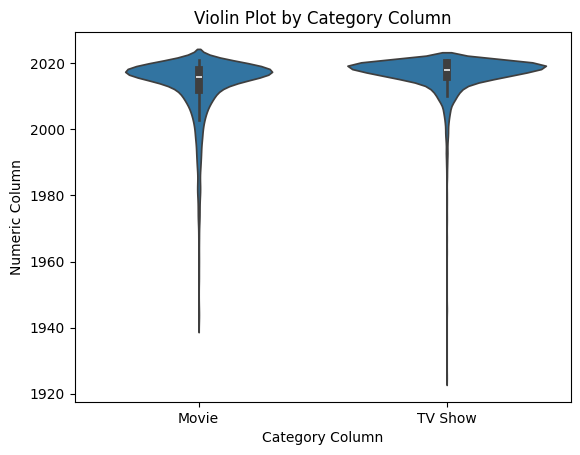

In [ ]:
# qaysi yili joylangan kinolar eng ko'p qanday turda bo'lgan
#6

# Box plot by category
sns.boxplot(x='type', y='release_year', data=df)
plt.xlabel('Category Column')
plt.ylabel('Numeric Column')
plt.title('Boxplot by Category Column')
plt.show()

# Violin plot by category
sns.violinplot(x='type', y='release_year', data=df)
plt.xlabel('Category Column')
plt.ylabel('Numeric Column')
plt.title('Violin Plot by Category Column')
plt.show()


In [ ]:
# Xulosalar



1.   Netflix-dagi eng ko'p kontent turi bu Kinolar(Movie)
2.   Eng ko'p mahsulot ishlab chiqargan davlat AQSH
3.   Netflix-dagi eng mashhur rejissyor, eng ko'p unvonga ega - Rajiv Chilaka
4.   Netflix-dagi eng ko'p joylangan janr bu - Xalqaro filmlar(International Movies)
5.   Netflix-dagi TV Show'lar uchun eng top aktyor - Takahiro Sakurai
6.   Netflix-dagi kinolar uchun eng top aktyor - Anupam Kher

